In [ ]:
pwd

'/content'

In [ ]:
ls

loan_approval_dataset.csv  sample_data/


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
## columns renamed
df.columns = ['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status']

In [ ]:

df['cibil_score'].min(), df['cibil_score'].max()

(300, 900)

In [ ]:
df.dtypes

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [ ]:
b = df[df['cibil_score']>=700]

In [ ]:
b.shape

(1430, 13)

In [ ]:
df['self_employed'].value_counts().keys()

Index([' Yes', ' No'], dtype='object', name='self_employed')

In [ ]:
self_employed = df[df['self_employed'] == " Yes"]

In [ ]:
bussiness_man = df[df['self_employed'] == " No"]


In [ ]:
self_employed['loan_status'].value_counts()

loan_status
 Approved    1338
 Rejected     812
Name: count, dtype: int64

In [ ]:
bussiness_man['loan_status'].value_counts()


loan_status
 Approved    1318
 Rejected     801
Name: count, dtype: int64

In [ ]:
df['education'].value_counts()

education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64

In [ ]:


c = df[df['income_annum']>= df['income_annum'].mean()]
c['loan_status'].value_counts()

loan_status
 Approved    1325
 Rejected     820
Name: count, dtype: int64

In [ ]:
df['loan_status'].value_counts()

loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

In [4]:
df['education'].map({' Graduate':1,' Not Graduate':0})

0       1
1       0
2       1
3       1
4       0
       ..
4264    1
4265    0
4266    0
4267    0
4268    1
Name: education, Length: 4269, dtype: int64

In [5]:
df['education'] = df['education'].map(lambda x:x[1:])

In [ ]:
# map(function , iterable)

def square(x):
  return x**2

lst = [2,3,4,5]


for item in lst:
  print(square(item))

4
9
16
25


In [ ]:
list(map(square,lst))

[4, 9, 16, 25]

In [6]:
df['education'] = df['education'].map({"Graduate":1,"Not Graduate":0})

In [ ]:
df['self_employed'].map()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,0,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,0,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,0,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [7]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,0,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,0,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,0,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [8]:
column_ls_with_space  = ["self_employed","loan_status"]
for col in column_ls_with_space:
  df[col] = df[col].map(lambda x:x[1:])


In [9]:
df['self_employed'] = df['self_employed'].map({"Yes":1,"No":0})

In [10]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [ ]:
df['loan_status'].value_counts(normalize=True)*100

loan_status
Approved    62.215976
Rejected    37.784024
Name: proportion, dtype: float64

In [11]:
df['loan_status'] = df['loan_status'].map({"Approved":1,"Rejected":0})

In [12]:
# y ===> loan status
# x ===>  other

x = df.drop('loan_status',axis=1)
y = df[['loan_status']]

In [ ]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [13]:
## TRaining testing split
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2)


In [15]:
# x  --> normalize
from sklearn.preprocessing import StandardScaler

In [16]:
std_scaler = StandardScaler()

In [17]:
x_train_transformed= std_scaler.fit_transform(x_train)
x_test_transformed = std_scaler.fit_transform(x_test)


In [18]:
x_train_transformed.shape

(3415, 12)

In [ ]:
####
no_of_neuron_at_input_layer = x.shape[1]
no_of_neuron_at_input_layer

output_layer_neuron = 1

In [19]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
ann_model = Sequential()

ann_model.add(Dense(units=68,activation='relu',input_dim=12))
ann_model.add(Dense(units=32,activation='relu'))
ann_model.add(Dense(units=24,activation='relu'))

ann_model.add(Dense(units=1,activation='sigmoid')) #softmax

ann_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

ann_model.summary()

# "categorical_crossentropy"
# "sparse_categroical_crossentropy"


# input --> hidden layer --->  output  ---

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 68)                884       
                                                                 
 dense_1 (Dense)             (None, 32)                2208      
                                                                 
 dense_2 (Dense)             (None, 24)                792       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 3909 (15.27 KB)
Trainable params: 3909 (15.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
history = ann_model.fit(x_train_transformed,y_train,epochs=12,validation_data=(x_test_transformed,y_test))

Epoch 1/12
107/107 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.2792 - val_accuracy: 0.9485
Epoch 2/12
107/107 [==============================] - 0s 2ms/step - loss: 7.2260e-04 - accuracy: 1.0000 - val_loss: 0.2731 - val_accuracy: 0.9508
Epoch 3/12
107/107 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2632 - val_accuracy: 0.9496
Epoch 4/12
107/107 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 0.9859 - val_loss: 0.2616 - val_accuracy: 0.9461
Epoch 5/12
107/107 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9874 - val_loss: 0.2056 - val_accuracy: 0.9543
Epoch 6/12
107/107 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9956 - val_loss: 0.2494 - val_accuracy: 0.9496
Epoch 7/12
107/107 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9941 - val_loss: 0.2250 - val_accuracy: 0.9543
Ep

In [24]:
import pandas as pd

In [37]:
training_details = pd.DataFrame(history.history)
training_details

,loss,accuracy,val_loss,val_accuracy
0,0.001020,1.000000,0.279196,0.948478
1,0.000723,1.000000,0.273101,0.950820
2,0.001113,1.000000,0.263233,0.949649
3,0.064478,0.985944,0.261590,0.946136
4,0.040549,0.987409,0.205648,0.954333
5,0.010935,0.995608,0.249409,0.949649
6,0.017439,0.994143,0.225030,0.954333
7,0.005428,0.998536,0.269652,0.943794
8,0.004709,0.999122,0.246865,0.947307
9,0.001760,1.000000,0.251020,0.949649


<Axes: >

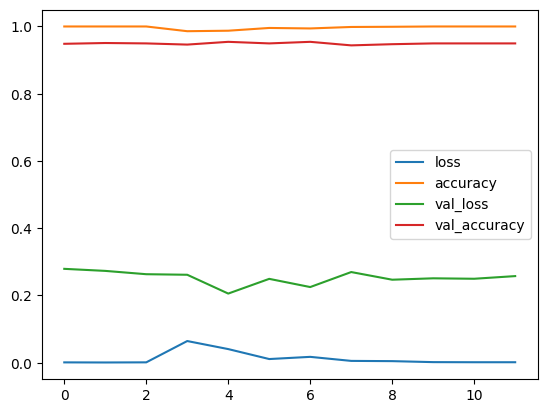

In [38]:
training_details.plot()

In [39]:
ann_model.save("loan_approval.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
pred = ann_model.predict(x_test_transformed)

27/27 [==============================] - 0s 1ms/step


In [43]:
pred.shape   , x_test_transformed.shape

((854, 1), (854, 12))

In [59]:
if pred[1][0]>0.5:
  print(1)
else:
  print(0)

0


In [61]:
prediction = (pred>0.5).astype(int).ravel()

In [51]:

y_test['prediction'] = prediction

In [52]:
y_test

,loan_status,prediction
838,1,1
1672,1,0
1053,1,1
1208,1,1
516,1,1
...,...,...
264,1,0
1135,0,0
3222,0,0
3515,1,1


In [54]:
from sklearn.metrics import confusion_matrix,classification_report

In [65]:
matrix = confusion_matrix(y_test['loan_status'],y_test['prediction'])
matrix

array([[301,  27],
       [ 16, 510]])

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

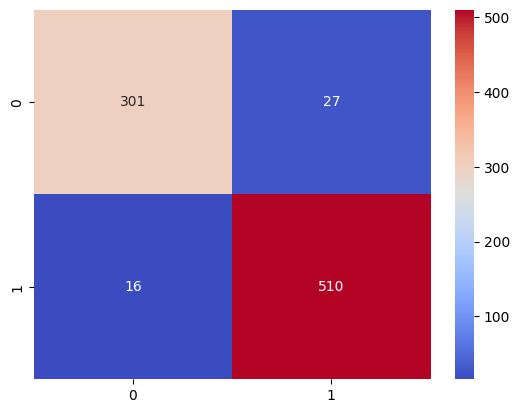

In [76]:
sns.heatmap(matrix,annot=True,fmt='d',cmap='coolwarm')